In [105]:
## Importing Libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import warnings
warnings.filterwarnings('ignore')


# from textblob import TextBlob

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [4]:
df=pd.read_csv("updated-dataset-with-subjectivity-polarity-label.csv", index_col=0)
df.head()

,Date,Open,High,Low,Ltp,Qty,Turnover,economic-subjectivity,economic-polarity,political-subjectivity,political-polarity,Label
0,2022-06-29,318.9,318.9,310.0,315.0,310.0,6127716.2,0.457500,0.017500,0.460909,-0.122727,0
1,2022-06-28,312.0,316.5,306.0,313.0,306.0,5707986.7,0.195556,0.017778,0.425000,0.350000,0
2,2022-06-27,322.0,325.0,310.0,312.0,310.0,11125995.5,0.225000,-0.012500,0.457792,0.169481,1
3,2022-06-26,312.9,320.0,308.0,320.0,308.0,28577745.1,0.253704,0.038889,0.570909,0.241818,0
4,2022-06-24,305.0,310.0,298.2,307.0,298.2,25399389.8,0.280303,0.042424,0.300000,0.128788,1


In [5]:
df.set_index('Date',inplace=True)

In [6]:
df

,Open,High,Low,Ltp,Qty,Turnover,economic-subjectivity,economic-polarity,political-subjectivity,political-polarity,Label
Date,,,,,,,,,,,
2022-06-29,318.9,318.9,310.0,315.0,310.0,6127716.2,0.457500,0.017500,0.460909,-0.122727,0
2022-06-28,312.0,316.5,306.0,313.0,306.0,5707986.7,0.195556,0.017778,0.425000,0.350000,0
2022-06-27,322.0,325.0,310.0,312.0,310.0,11125995.5,0.225000,-0.012500,0.457792,0.169481,1
2022-06-26,312.9,320.0,308.0,320.0,308.0,28577745.1,0.253704,0.038889,0.570909,0.241818,0
2022-06-24,305.0,310.0,298.2,307.0,298.2,25399389.8,0.280303,0.042424,0.300000,0.128788,1
...,...,...,...,...,...,...,...,...,...,...,...
2016-07-17,869.0,955.0,886.0,955.0,886.0,2538590.0,0.277273,0.218182,0.461818,0.004545,0
2016-07-14,790.0,869.0,805.0,869.0,805.0,151344.0,0.303030,0.090909,0.326515,-0.087879,0
2016-07-13,719.0,790.0,733.0,790.0,733.0,4231540.0,0.293182,0.337121,0.444805,-0.012987,0


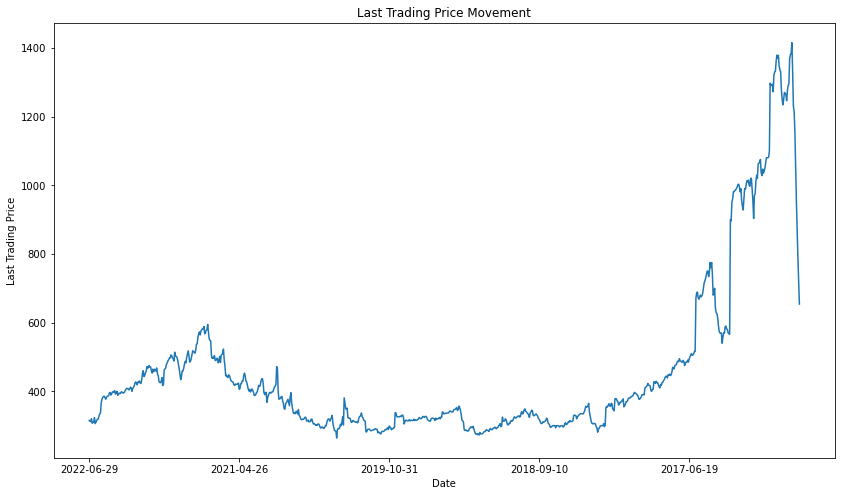

In [7]:
df['Ltp'].plot(figsize=(14,8))
plt.ylabel("Last Trading Price")
plt.title("Last Trading Price Movement")
plt.show()

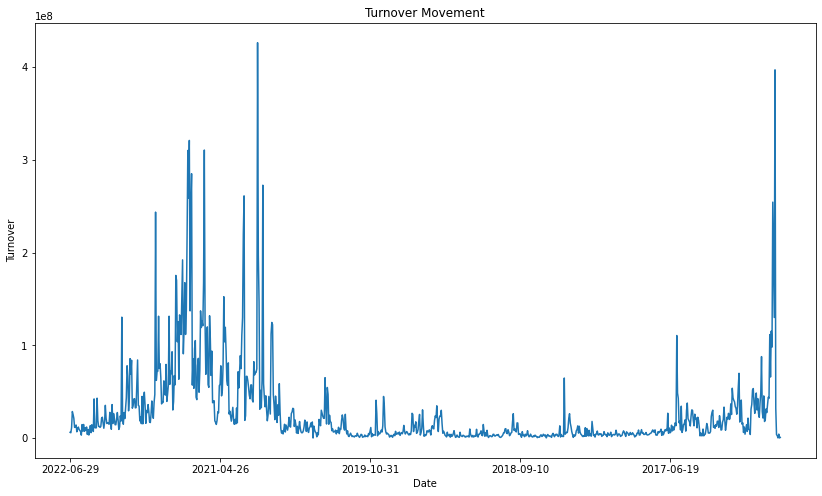

In [8]:
df['Turnover'].plot(figsize=(14,8))
plt.ylabel("Turnover")
plt.title("Turnover Movement")
plt.show()

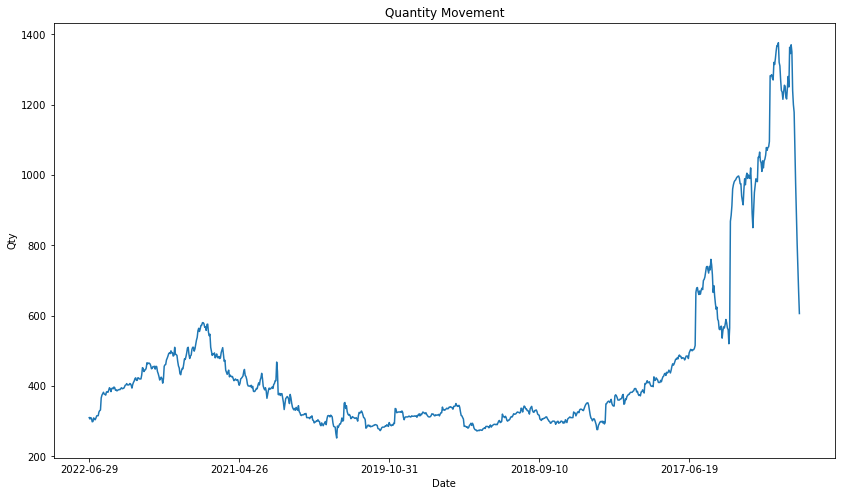

In [9]:
df['Qty'].plot(figsize=(14,8))
plt.ylabel("Qty")
plt.title("Quantity Movement")
plt.show()

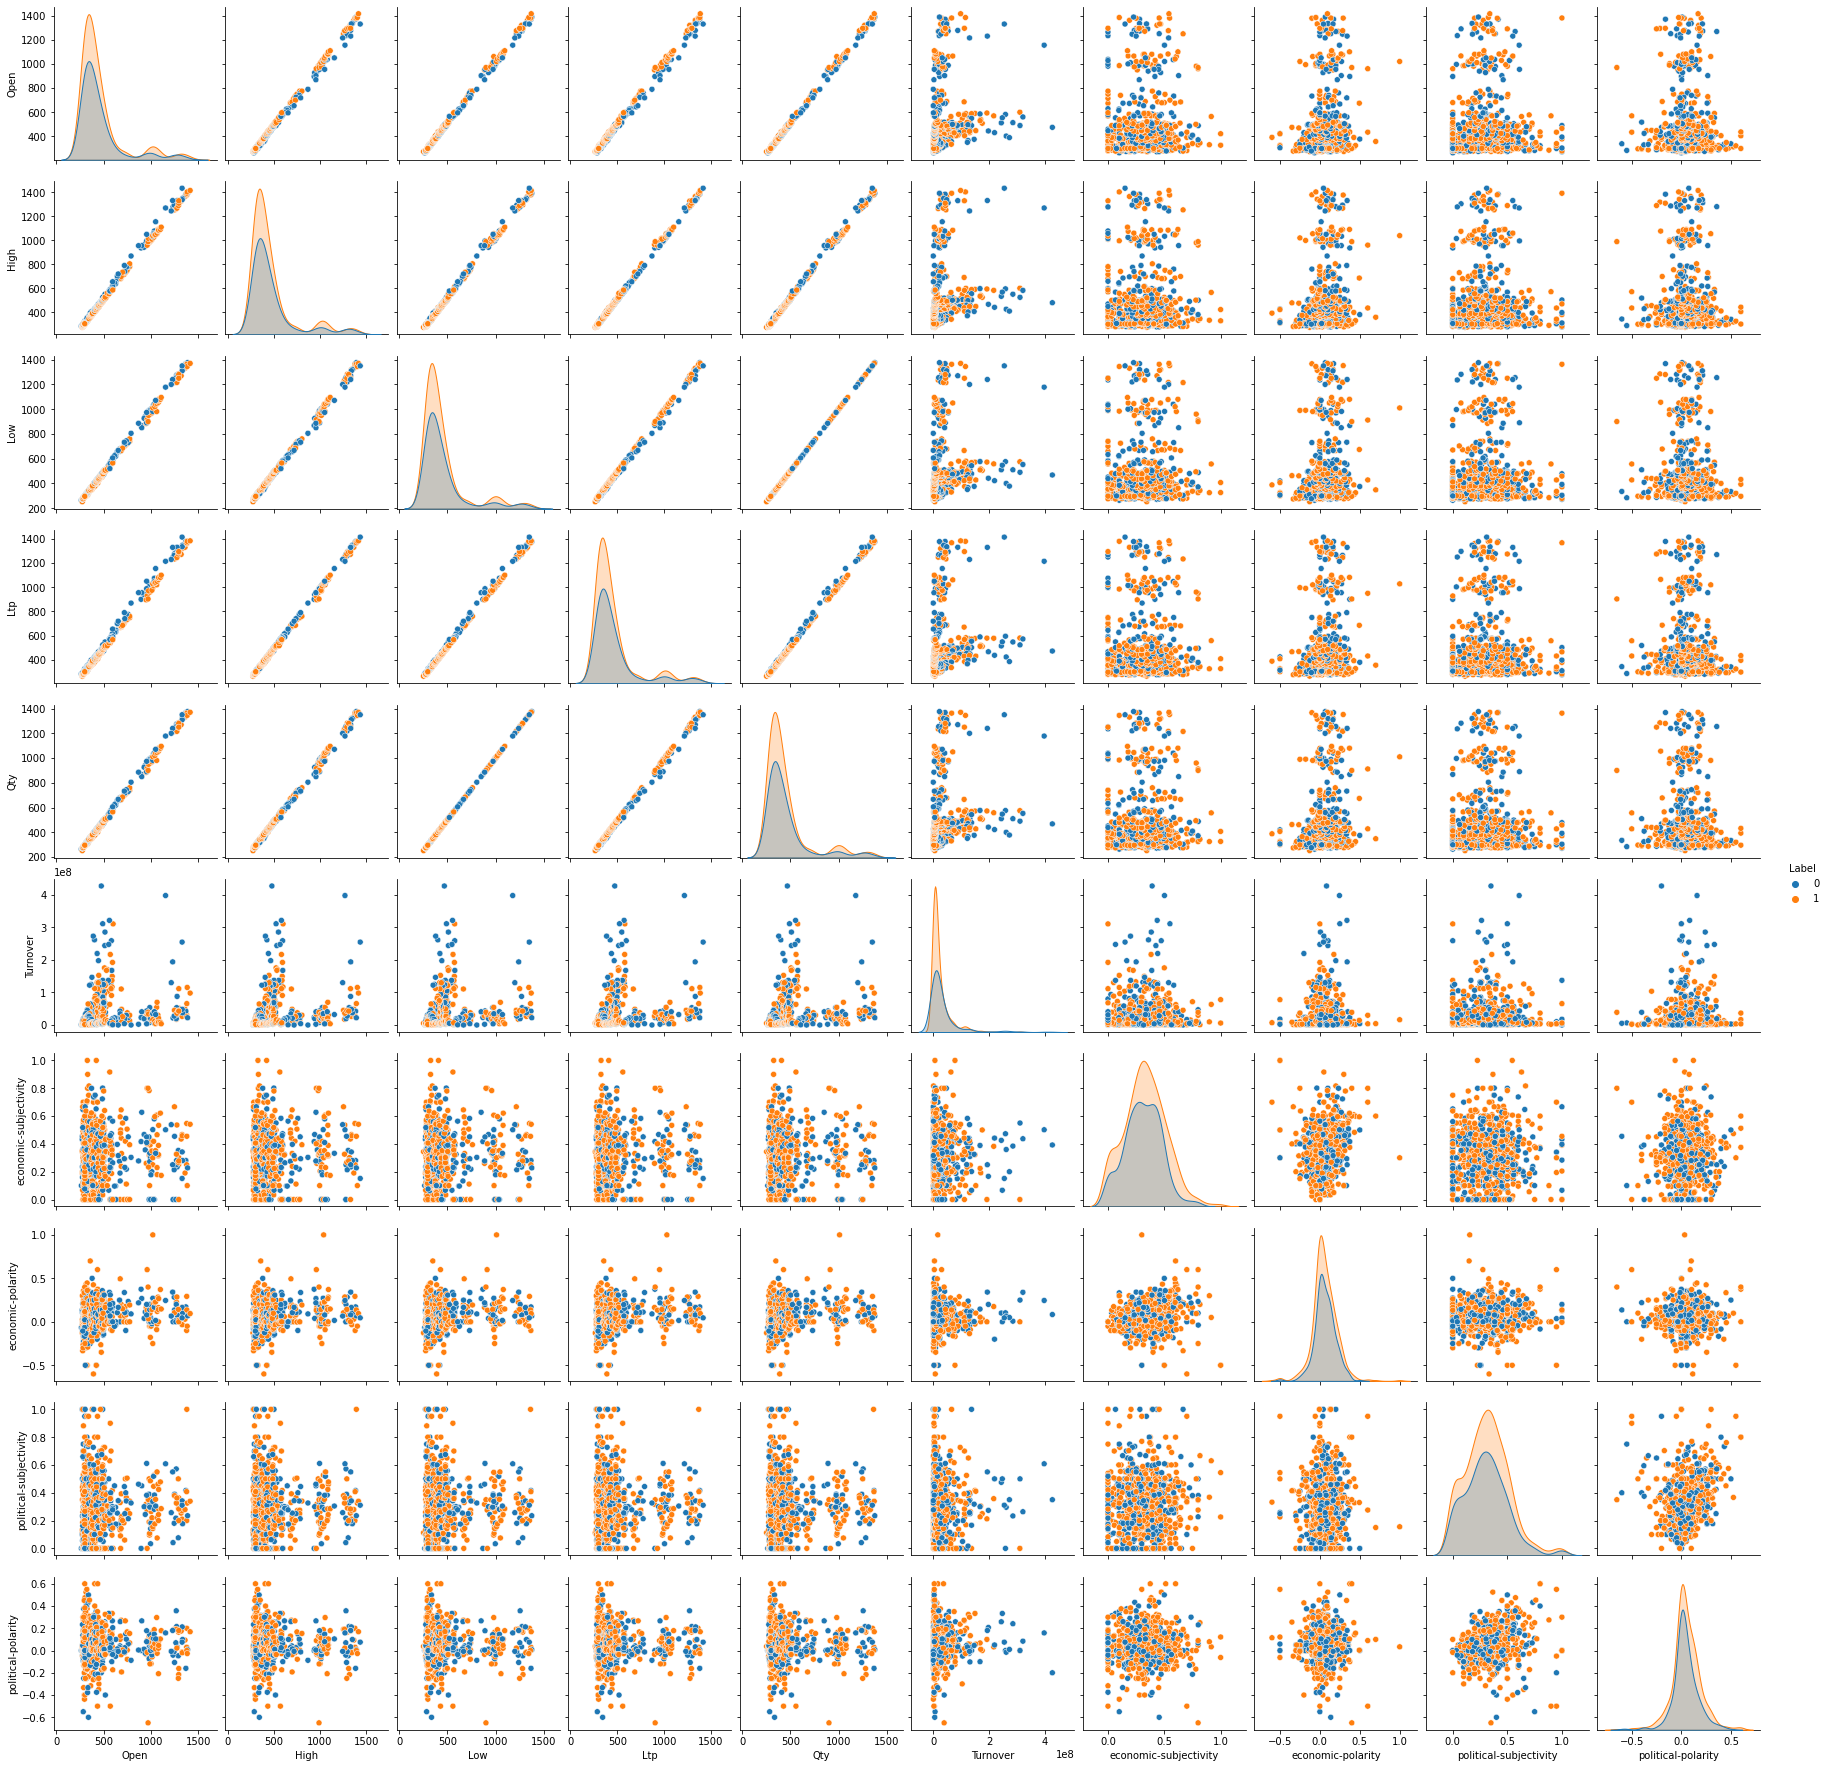

In [11]:
# Paiplot of  dataframe
sns.pairplot(df, hue = 'Label')

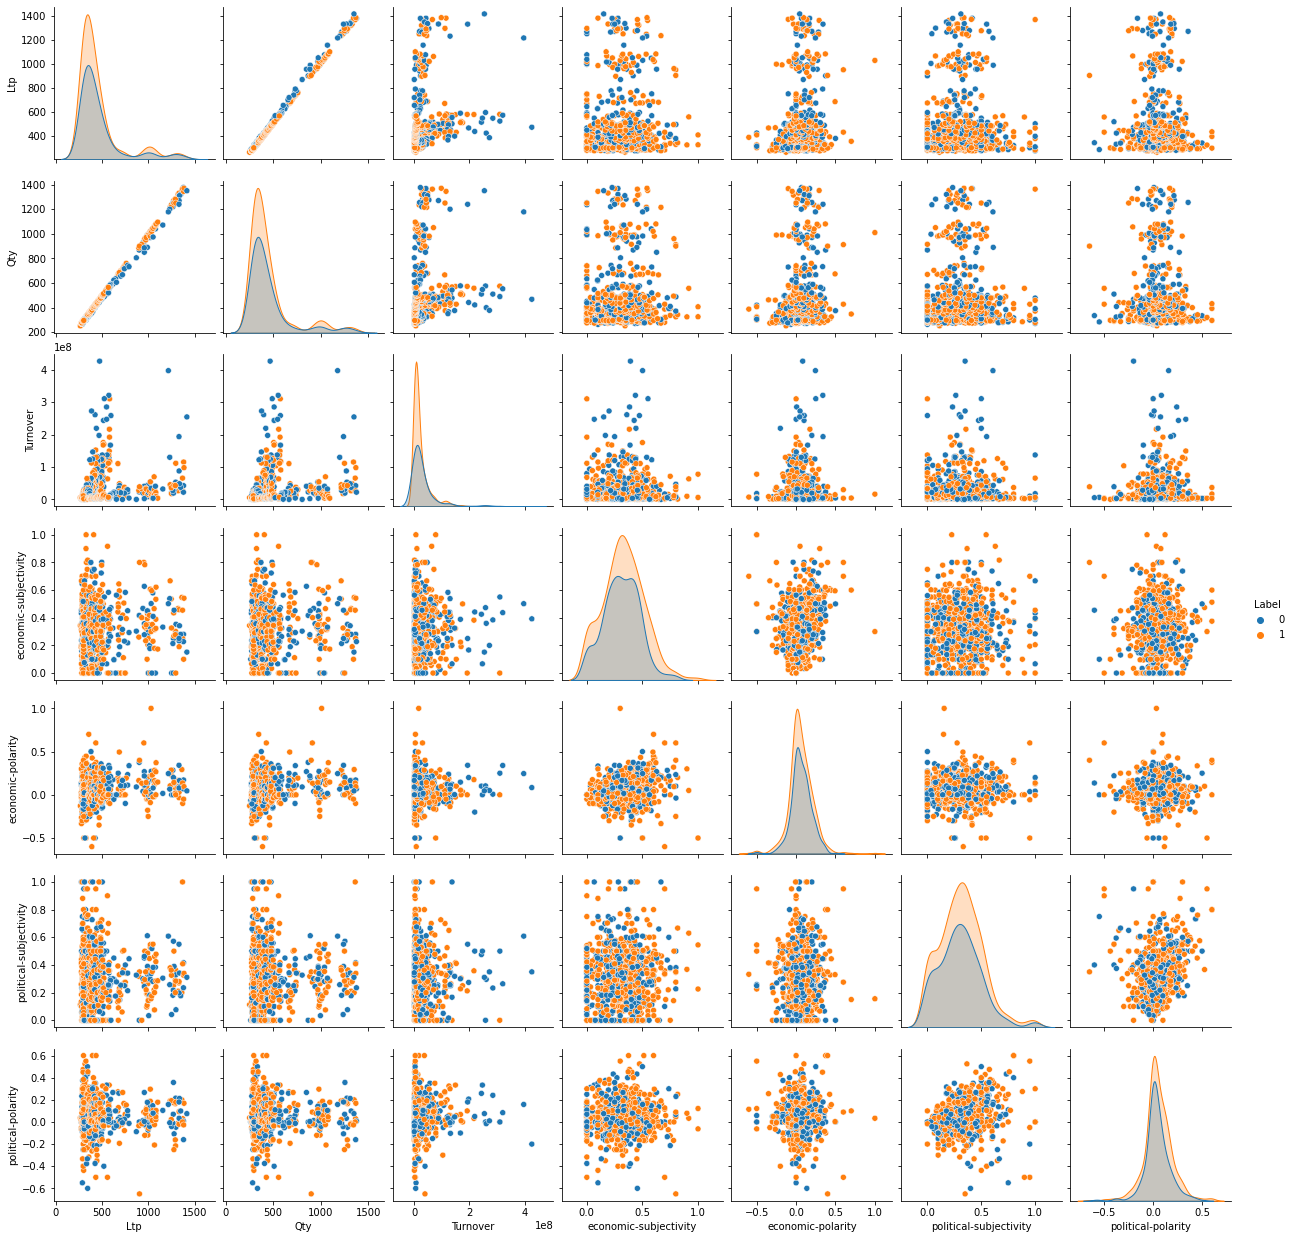

In [15]:
# pair plot of sample feature
sns.pairplot(df, hue = 'Label', 
             vars = ['Ltp', 'Qty', 'Turnover','economic-subjectivity', 
                     'economic-polarity', 'political-subjectivity','political-polarity',] );

In [16]:
## Make correlation matrix 

df.corr()

,Open,High,Low,Ltp,Qty,Turnover,economic-subjectivity,economic-polarity,political-subjectivity,political-polarity,Label
Open,1.000000,0.999023,0.999335,0.998562,0.999335,0.249468,0.007509,0.148061,0.001911,0.008607,0.005345
High,0.999023,1.000000,0.999134,0.999587,0.999134,0.259375,0.006479,0.150168,0.002528,0.009023,-0.011553
Low,0.999335,0.999134,1.000000,0.999251,1.000000,0.246582,0.004674,0.147470,0.002132,0.008001,-0.005621
Ltp,0.998562,0.999587,0.999251,1.000000,0.999251,0.253623,0.006837,0.150450,0.003092,0.009975,-0.020217
Qty,0.999335,0.999134,1.000000,0.999251,1.000000,0.246582,0.004674,0.147470,0.002132,0.008001,-0.005621
Turnover,0.249468,0.259375,0.246582,0.253623,0.246582,1.000000,0.002024,0.010022,-0.006702,0.039462,-0.107496
economic-subjectivity,0.007509,0.006479,0.004674,0.006837,0.004674,0.002024,1.000000,0.234261,0.029147,0.012509,0.053871
economic-polarity,0.148061,0.150168,0.147470,0.150450,0.147470,0.010022,0.234261,1.000000,0.025870,-0.029237,-0.013810
political-subjectivity,0.001911,0.002528,0.002132,0.003092,0.002132,-0.006702,0.029147,0.025870,1.000000,0.231214,0.027941
political-polarity,0.008607,0.009023,0.008001,0.009975,0.008001,0.039462,0.012509,-0.029237,0.231214,1.000000,0.032617


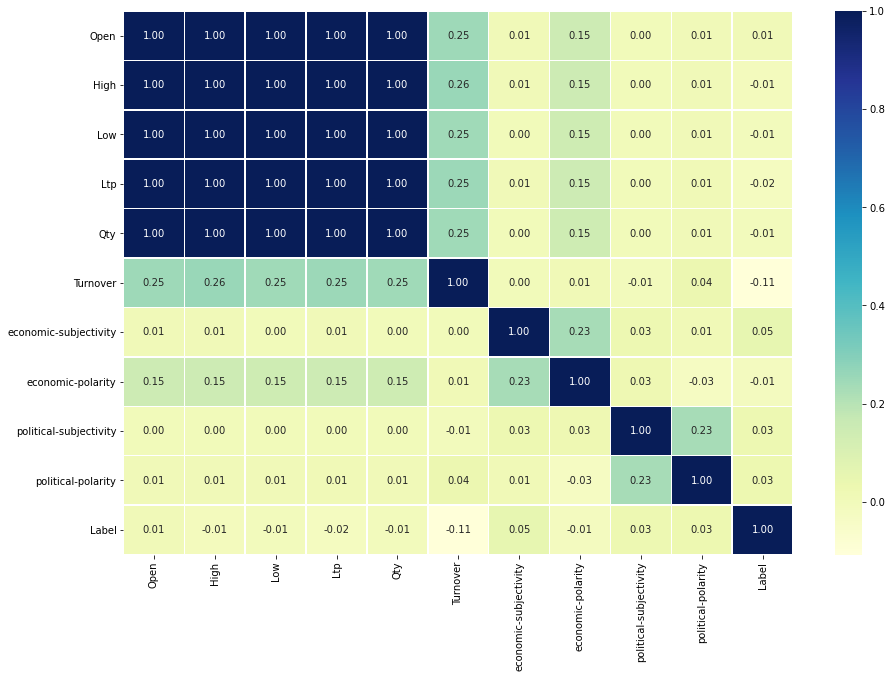

In [17]:
## making correlation matrix more understable 

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax =  sns.heatmap(corr_matrix,
                  annot=True,
                  linewidth=0.5,
                  fmt=".2f",
                  cmap="YlGnBu",);

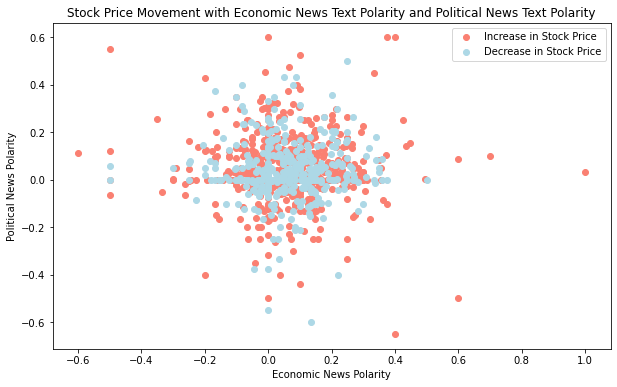

In [18]:
# Create another figure

plt.figure(figsize=(10,6))

# Scatter with positive example
plt.scatter(df["economic-polarity"][df["Label"]==1],
            df["political-polarity"][df["Label"]==1],
            color=["salmon"])

# Scatter with negative example 
plt.scatter(df["economic-polarity"][df["Label"]==0],
            df["political-polarity"][df["Label"]==0],
            color=["lightblue"])

plt.title("Stock Price Movement with Economic News Text Polarity and Political News Text Polarity")
plt.xlabel("Economic News Polarity")
plt.ylabel("Political News Polarity")
plt.legend(["Increase in Stock Price","Decrease in Stock Price"])

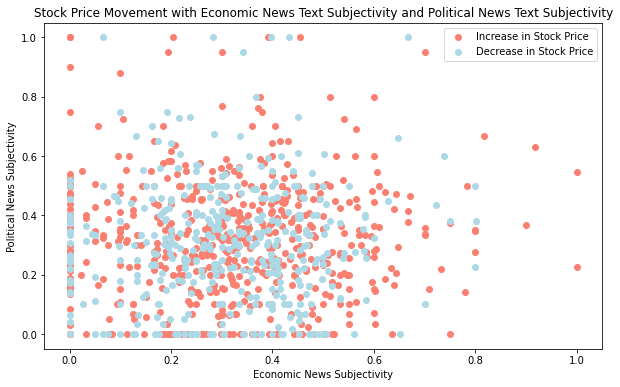

In [20]:
# Create another figure

plt.figure(figsize=(10,6))

# Scatter with positive example
plt.scatter(df["economic-subjectivity"][df["Label"]==1],
            df["political-subjectivity"][df["Label"]==1],
            color=["salmon"])

# Scatter with negative example 
plt.scatter(df["economic-subjectivity"][df["Label"]==0],
            df["political-subjectivity"][df["Label"]==0],
            color=["lightblue"])

plt.title("Stock Price Movement with Economic News Text Subjectivity and Political News Text Subjectivity")
plt.xlabel("Economic News Subjectivity")
plt.ylabel("Political News Subjectivity")
plt.legend(["Increase in Stock Price","Decrease in Stock Price"])

In [22]:
df.columns

Index(['Open', 'High', 'Low', 'Ltp', 'Qty', 'Turnover',
       'economic-subjectivity', 'economic-polarity', 'political-subjectivity',
       'political-polarity', 'Label'],
      dtype='object')

## Summary Statistics and Visualize of Economic Text

In [23]:
#Statistics of Economic Text Subjectivity
df['economic-subjectivity'].describe()

count    948.000000
mean       0.320811
std        0.176394
min        0.000000
25%        0.200000
50%        0.315757
75%        0.439015
max        1.000000
Name: economic-subjectivity, dtype: float64

In [24]:
df['economic-subjectivity'].value_counts()

0.000000    62
0.100000    17
0.300000    16
0.400000    15
0.500000    14
            ..
0.178788     1
0.457500     1
0.183333     1
0.599351     1
0.508929     1
Name: economic-subjectivity, Length: 596, dtype: int64

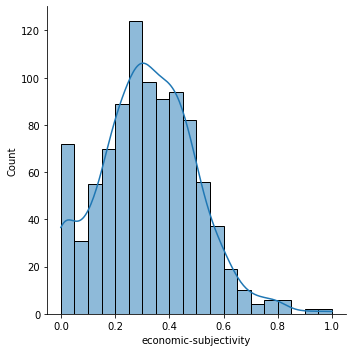

In [25]:
sns.displot(df['economic-subjectivity'], bins=20, kde=True);

In [26]:
#Statistics of Economic Text Polarity
df['economic-polarity'].describe()

count    948.000000
mean       0.059365
std        0.141399
min       -0.600000
25%       -0.006184
50%        0.050000
75%        0.136552
max        1.000000
Name: economic-polarity, dtype: float64

In [27]:
#Statistics of Economic Text Polarity
df['economic-polarity'].value_counts()

0.000000    104
0.100000     21
0.050000     18
0.250000     17
0.200000     11
           ... 
0.047273      1
0.203283      1
0.287500      1
0.288889      1
0.064545      1
Name: economic-polarity, Length: 563, dtype: int64

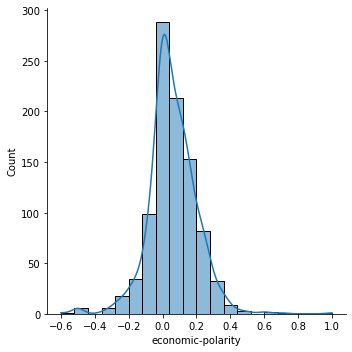

In [28]:
sns.displot(df['economic-polarity'], bins=20, kde=True);

In [29]:
#Statistics of Political Text Subjectivity
df['political-subjectivity'].describe()

count    948.000000
mean       0.307988
std        0.198543
min        0.000000
25%        0.175000
50%        0.300000
75%        0.428417
max        1.000000
Name: political-subjectivity, dtype: float64

In [30]:
df['political-subjectivity'].value_counts()

0.000000    90
0.500000    40
0.100000    28
0.250000    18
0.400000    15
            ..
0.637500     1
0.238384     1
0.271429     1
0.396429     1
0.257143     1
Name: political-subjectivity, Length: 513, dtype: int64

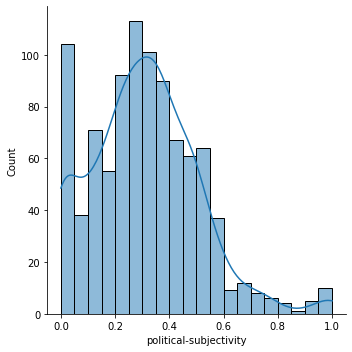

In [31]:
sns.displot(df['political-subjectivity'], bins=20, kde=True);

In [32]:
#Statistics of Political Text Polarity
df['political-polarity'].describe()

count    948.000000
mean       0.044399
std        0.137091
min       -0.650000
25%       -0.004505
50%        0.027435
75%        0.110278
max        0.600000
Name: political-polarity, dtype: float64

In [33]:
df['political-polarity'].value_counts()

 0.000000    158
 0.100000     17
 0.136364     13
-0.050000     11
 0.050000     10
            ... 
 0.111806      1
 0.220606      1
 0.104545      1
 0.166667      1
 0.196591      1
Name: political-polarity, Length: 533, dtype: int64

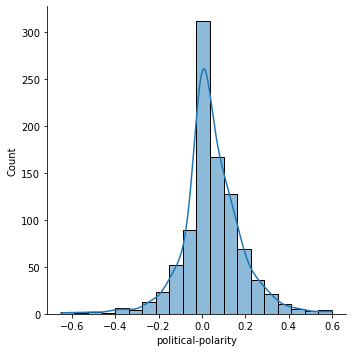

In [34]:
sns.displot(df['political-polarity'], bins=20, kde=True);

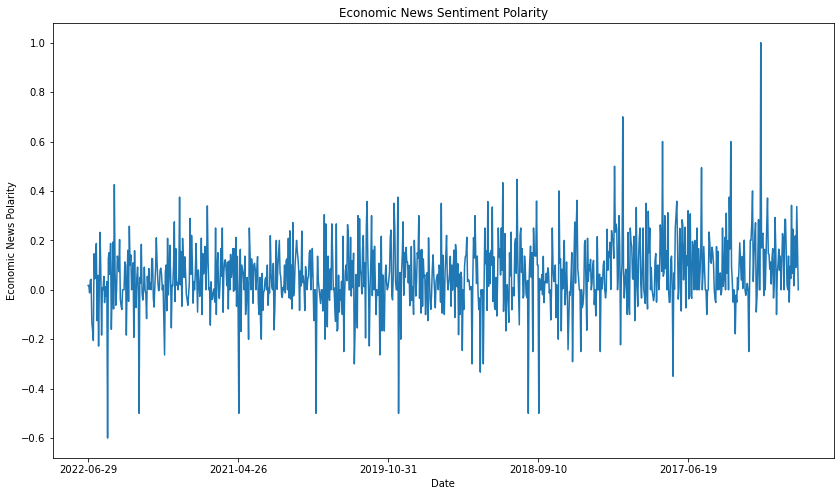

In [35]:
df['economic-polarity'].plot(figsize=(14,8))
plt.ylabel("Economic News Polarity")
plt.title("Economic News Sentiment Polarity")
plt.show()

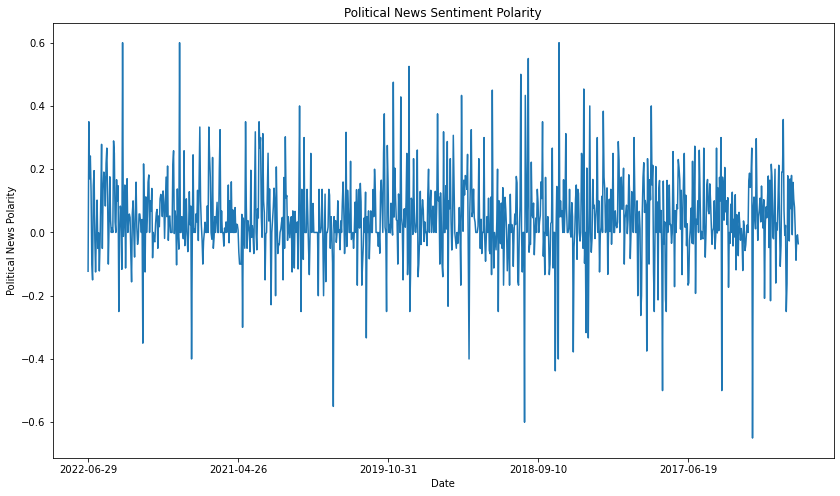

In [36]:
df['political-polarity'].plot(figsize=(14,8))
plt.ylabel("Political News Polarity")
plt.title("Political News Sentiment Polarity")
plt.show()

In [37]:
df

,Open,High,Low,Ltp,Qty,Turnover,economic-subjectivity,economic-polarity,political-subjectivity,political-polarity,Label
Date,,,,,,,,,,,
2022-06-29,318.9,318.9,310.0,315.0,310.0,6127716.2,0.457500,0.017500,0.460909,-0.122727,0
2022-06-28,312.0,316.5,306.0,313.0,306.0,5707986.7,0.195556,0.017778,0.425000,0.350000,0
2022-06-27,322.0,325.0,310.0,312.0,310.0,11125995.5,0.225000,-0.012500,0.457792,0.169481,1
2022-06-26,312.9,320.0,308.0,320.0,308.0,28577745.1,0.253704,0.038889,0.570909,0.241818,0
2022-06-24,305.0,310.0,298.2,307.0,298.2,25399389.8,0.280303,0.042424,0.300000,0.128788,1
...,...,...,...,...,...,...,...,...,...,...,...
2016-07-17,869.0,955.0,886.0,955.0,886.0,2538590.0,0.277273,0.218182,0.461818,0.004545,0
2016-07-14,790.0,869.0,805.0,869.0,805.0,151344.0,0.303030,0.090909,0.326515,-0.087879,0
2016-07-13,719.0,790.0,733.0,790.0,733.0,4231540.0,0.293182,0.337121,0.444805,-0.012987,0


## Modelling 
Split the data in feature matrix (X) and target vector (y).

In [38]:
# Create feature data set
X = df
X = np.array(X.drop(['Label'], 1))

# Create target data set
y = np.array(df['Label'])

We split the data into train and test sets to verify predictions. Time series data cannot be split randomly as this would introduce look-ahead bias so the first 80% will be the training set and the last 20% the test set.

In [39]:
# Split data into 80% training and 20% testing data sets

split = int(0.8*len(df))

In [40]:
X_train = X[0:split]
y_train = y[0:split]

X_test = X[split:]
y_test = y[split:]

In [41]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(758, 10)
(758,)
(190, 10)
(190,)


## Feature scaling
We will standardise the data using scikit-learn's preprocessing.scale() algorithm so that it is all on one scale.

In [42]:
# Standardise X's
X_train = scale(X_train)
X_test = scale(X_test)

## Modeling

In [117]:
models = {"LDA":LinearDiscriminantAnalysis(),
          "SVMClassifier": SVC(),
          'SGDClassifier': SGDClassifier(),
          "KNN":KNeighborsClassifier(),
          "Random Forest":RandomForestClassifier(),
          "Gaussian Naive Bayes": GaussianNB(),
        }

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test): 
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data(with no labels)
    X_test: testing data(with no labels)
    y_train: training labels
    y_test: testing labels
    """
    
    #set random seed
    np.random.seed(42)

    # Making a dictionary to keep model scoresS
    model_scores = {}

    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)

        #Evaluate the model and  append  it's score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [118]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

In [119]:
model_scores

{'LDA': 0.7421052631578947,
 'SVMClassifier': 0.6,
 'SGDClassifier': 0.7157894736842105,
 'KNN': 0.5526315789473685,
 'Random Forest': 0.6368421052631579,
 'Gaussian Naive Bayes': 0.5894736842105263}

## Model Comparison

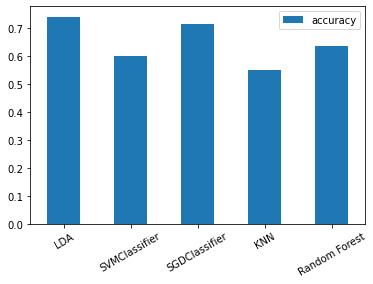

In [46]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()

plt.xticks(rotation=30, horizontalalignment='center');

## Hyper Parameter Tuning

In [100]:
#Hyperparameters
cv_lda=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_lda = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'n_components':[1,2,3,4,5]   
}

grid_svm = {
    'C': [0.1, 1, 10, 100, 1000], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf','linear', 'poly', 'sigmoid']
    }

grid_sgd = {
    'penalty': ['l2','l1','elasticnet'],
    'n_jobs': [-1],
    'max_iter': [20,50,100,500,1000],
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron',
            'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'validation_fraction': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
}

grid_knn ={
    'leaf_size':np.arange(1,50),
    'n_neighbors':np.arange(1,30),
    'p':[1,2]
}

grid_rf = {
    'n_estimators': [20, 50, 100, 500, 1000],  
    'max_depth': np.arange(1, 100, 1),  
    'min_samples_split': [2, 10, 9], 
    'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
    'bootstrap': [True, False], 
    'random_state': [1, 2, 30, 42]
}

grid_nb = {"var_smoothing":np.logspace(0,-9,100)}

# Tune LinearDiscriminantAnalysis for cv=5

In [48]:
np.random.seed(42)

# Setup random hyperparameter search for LinearDiscriminantAnalysis
lda_cv5 = RandomizedSearchCV(LinearDiscriminantAnalysis(),
                                param_distributions=grid_lda,
                                cv=5,
                                n_iter=10,
                                verbose=True,
                                n_jobs=-1)

#Fit random hyperparameter search model for LinearDiscriminantAnalysis 
lda_cv5.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.4s finished


RandomizedSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
                   param_distributions={'n_components': [1, 2, 3, 4, 5],
                                        'solver': ['svd', 'lsqr', 'eigen']},
                   verbose=True)

In [49]:
# Find the best parameters
lda_cv5.best_params_

{'solver': 'svd', 'n_components': 1}

In [50]:
model_lda_cv5=LinearDiscriminantAnalysis(solver = 'svd', n_components= 1).fit(X_train,y_train)

In [51]:
# Show lda model's predictions for cv=5
predictions_lda_cv5 = model_lda_cv5.predict(X_test)
predictions_lda_cv5

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [52]:
# Show lda model metrics for cv=5
print(classification_report(y_test, predictions_lda_cv5))

              precision    recall  f1-score   support

           0       0.94      0.39      0.55        77
           1       0.70      0.98      0.82       113

    accuracy                           0.74       190
   macro avg       0.82      0.69      0.68       190
weighted avg       0.80      0.74      0.71       190



# Tune LinearDiscriminantAnalysis for cv=10

In [53]:
np.random.seed(42)

# Setup random hyperparameter search for LinearDiscriminantAnalysis
lda_cv10 = RandomizedSearchCV(LinearDiscriminantAnalysis(),
                                param_distributions=grid_lda,
                                cv=10,
                                n_iter=10,
                                verbose=True,
                                n_jobs=-1)

#Fit random hyperparameter search model for LinearDiscriminantAnalysis 
lda_cv10.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  85 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished


RandomizedSearchCV(cv=10, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
                   param_distributions={'n_components': [1, 2, 3, 4, 5],
                                        'solver': ['svd', 'lsqr', 'eigen']},
                   verbose=True)

In [54]:
# Find the best parameters
lda_cv10.best_params_

{'solver': 'svd', 'n_components': 1}

In [55]:
# Evaluate the randomized search LinearDiscriminantAnalysis Model
lda_cv10.score(X_test, y_test)

0.7421052631578947

In [56]:
model_lda_cv10=LinearDiscriminantAnalysis(solver = 'svd', n_components= 1).fit(X_train,y_train)

# Show lda model's predictions for cv=10
predictions_lda_cv10 = model_lda_cv10.predict(X_test)

# Show lda model metrics for cv=10
print(classification_report(y_test, predictions_lda_cv10))

              precision    recall  f1-score   support

           0       0.94      0.39      0.55        77
           1       0.70      0.98      0.82       113

    accuracy                           0.74       190
   macro avg       0.82      0.69      0.68       190
weighted avg       0.80      0.74      0.71       190



# Tune SVM for cv = 5

In [59]:
np.random.seed(42)

# Setup random hyperparameter search for SVM
svm_cv5 = RandomizedSearchCV(SVC(),
                        param_distributions=grid_svm,
                        cv=5,
                        n_iter=20,
                        verbose=True)

#Fit random hyperparameter search model for SVM 
svm_cv5.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.5s finished


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf', 'linear', 'poly',
                                                   'sigmoid']},
                   verbose=True)

In [60]:
# Find the best parameters
svm_cv5.best_params_

{'kernel': 'linear', 'gamma': 0.001, 'C': 100}

In [61]:
# Evaluate the randomized search SVM Model
svm_cv5.score(X_test, y_test)

0.7789473684210526

In [62]:
model_svm_cv5=SVC(kernel='linear', gamma=0.001, C=100).fit(X_train,y_train)

# Show SVM model's predictions for cv=5
predictions_svm_cv5 = model_svm_cv5.predict(X_test)

# Show SVM model metrics for cv=5
print(classification_report(y_test, predictions_svm_cv5))

              precision    recall  f1-score   support

           0       0.87      0.53      0.66        77
           1       0.75      0.95      0.84       113

    accuracy                           0.78       190
   macro avg       0.81      0.74      0.75       190
weighted avg       0.80      0.78      0.77       190



# Tune SVM for cv = 10

In [63]:
np.random.seed(42)

# Setup random hyperparameter search for SVM
svm_cv10 = RandomizedSearchCV(SVC(),
                        param_distributions=grid_svm,
                        cv=10,
                        n_iter=20,
                        verbose=True)

#Fit random hyperparameter search model for SVM 
svm_cv10.fit(X_train,y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   18.4s finished


RandomizedSearchCV(cv=10, estimator=SVC(), n_iter=20,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf', 'linear', 'poly',
                                                   'sigmoid']},
                   verbose=True)

In [64]:
# Find the best parameters
svm_cv10.best_params_

{'kernel': 'linear', 'gamma': 0.001, 'C': 100}

In [65]:
# Evaluate the randomized search SVM Model
svm_cv10.score(X_test, y_test)

0.7789473684210526

In [66]:
model_svm_cv10=SVC(kernel= 'linear', gamma= 0.001, C= 100).fit(X_train,y_train)

# Show SVM model's predictions for cv=10
predictions_svm_cv10 = model_svm_cv10.predict(X_test)

# Show SVM model metrics for cv=10
print(classification_report(y_test, predictions_svm_cv10))

              precision    recall  f1-score   support

           0       0.87      0.53      0.66        77
           1       0.75      0.95      0.84       113

    accuracy                           0.78       190
   macro avg       0.81      0.74      0.75       190
weighted avg       0.80      0.78      0.77       190



# Tune SGDClassifier for cv = 5

In [77]:
np.random.seed(42)

# Setup random hyperparameter search for SGDClassifier
sgd_cv5 = RandomizedSearchCV(SGDClassifier(),
                        param_distributions=grid_sgd,
                        cv=5,
                        n_iter=20,
                        verbose=True)

#Fit random hyperparameter search model for SGDClassifier 
sgd_cv5.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, estimator=SGDClassifier(), n_iter=20,
                   param_distributions={'loss': ['hinge', 'log',
                                                 'modified_huber',
                                                 'squared_hinge', 'perceptron',
                                                 'huber', 'epsilon_insensitive',
                                                 'squared_epsilon_insensitive'],
                                        'max_iter': [20, 50, 100, 500, 1000],
                                        'n_jobs': [-1],
                                        'penalty': ['l2', 'l1', 'elasticnet'],
                                        'validation_fraction': [0.1, 0.2, 0.3,
                                                                0.4, 0.5, 0.6,
                                                                0.7, 0.8,
                                                                0.9]},
                   verbose=True)

In [78]:
# Find the best parameters
sgd_cv5.best_params_

{'validation_fraction': 0.1,
 'penalty': 'l1',
 'n_jobs': -1,
 'max_iter': 100,
 'loss': 'modified_huber'}

In [79]:
# Evaluate the randomized search SGD Model
sgd_cv5.score(X_test, y_test)

0.8105263157894737

In [80]:
model_sgd_cv5=SGDClassifier(validation_fraction=0.1, penalty='l1', n_jobs=-1, max_iter=100, loss='modified_huber').fit(X_train,y_train)

# Show SGD model's predictions for cv=5
predictions_sgd_cv5 = model_sgd_cv5.predict(X_test)

# Show SGD model metrics for cv=5
print(classification_report(y_test, predictions_sgd_cv5))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75        77
           1       0.85      0.76      0.80       113

    accuracy                           0.78       190
   macro avg       0.77      0.78      0.78       190
weighted avg       0.79      0.78      0.78       190



# Tune SGDClassifier for cv = 10

In [81]:
np.random.seed(42)

# Setup random hyperparameter search for SGDClassifier
sgd_cv10 = RandomizedSearchCV(SGDClassifier(),
                        param_distributions=grid_sgd,
                        cv=10,
                        n_iter=20,
                        verbose=True,
                        n_jobs=-1)

#Fit random hyperparameter search model for SGDClassifier 
sgd_cv10.fit(X_train,y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    7.5s finished


RandomizedSearchCV(cv=10, estimator=SGDClassifier(), n_iter=20, n_jobs=-1,
                   param_distributions={'loss': ['hinge', 'log',
                                                 'modified_huber',
                                                 'squared_hinge', 'perceptron',
                                                 'huber', 'epsilon_insensitive',
                                                 'squared_epsilon_insensitive'],
                                        'max_iter': [20, 50, 100, 500, 1000],
                                        'n_jobs': [-1],
                                        'penalty': ['l2', 'l1', 'elasticnet'],
                                        'validation_fraction': [0.1, 0.2, 0.3,
                                                                0.4, 0.5, 0.6,
                                                                0.7, 0.8,
                                                                0.9]},
                   verbose=True)

In [82]:
# Find the best parameters
sgd_cv10.best_params_

{'validation_fraction': 0.6,
 'penalty': 'l1',
 'n_jobs': -1,
 'max_iter': 50,
 'loss': 'perceptron'}

In [83]:
# Evaluate the randomized search SGDClassifier Model
sgd_cv10.score(X_test, y_test)

0.7736842105263158

In [84]:
model_sgd_cv10=SGDClassifier(validation_fraction= 0.6, penalty='l1', n_jobs= -1, max_iter=50, loss='perceptron').fit(X_train,y_train)

# Show SGD model's predictions for cv=10
predictions_sgd_cv10 = model_sgd_cv10.predict(X_test)

# Show SGD model metrics for cv=10
print(classification_report(y_test, predictions_sgd_cv10))

              precision    recall  f1-score   support

           0       0.68      0.77      0.72        77
           1       0.83      0.75      0.79       113

    accuracy                           0.76       190
   macro avg       0.75      0.76      0.75       190
weighted avg       0.77      0.76      0.76       190



# Tune KNeighborsClassifier for cv = 5

In [85]:
np.random.seed(42)

# Setup random hyperparameter search for KNeighborsClassifier
knn_cv5 = RandomizedSearchCV(KNeighborsClassifier(),
                        param_distributions=grid_knn,
                        cv=5,
                        n_iter=20,
                        verbose=True)

#Fit random hyperparameter search model for KNeighborsClassifier 
knn_cv5.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=20,
                   param_distributions={'leaf_size': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                                        'p': [1, 2]},
                   verbose=True)

In [86]:
# Find the best parameters
knn_cv5.best_params_

{'p': 2, 'n_neighbors': 28, 'leaf_size': 42}

In [87]:
# Evaluate the randomized search KNeighborsClassifier Model
knn_cv5.score(X_test, y_test)

0.631578947368421

In [88]:
model_knn_cv5=KNeighborsClassifier(p=2, n_neighbors=28, leaf_size= 42).fit(X_train,y_train)

# Show lda model's predictions for cv=5
predictions_knn_cv5 = model_knn_cv5.predict(X_test)

# Show lda model metrics for cv=5
print(classification_report(y_test, predictions_knn_cv5))

              precision    recall  f1-score   support

           0       0.57      0.35      0.44        77
           1       0.65      0.82      0.73       113

    accuracy                           0.63       190
   macro avg       0.61      0.59      0.58       190
weighted avg       0.62      0.63      0.61       190



# Tune KNeighborsClassifier for cv = 10

In [89]:
np.random.seed(42)

# Setup random hyperparameter search for KNeighborsClassifier
knn_cv10 = RandomizedSearchCV(KNeighborsClassifier(),
                        param_distributions=grid_knn,
                        cv=10,
                        n_iter=20,
                        verbose=True)

#Fit random hyperparameter search model for KNeighborsClassifier 
knn_cv10.fit(X_train,y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.8s finished


RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(), n_iter=20,
                   param_distributions={'leaf_size': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                                        'p': [1, 2]},
                   verbose=True)

In [90]:
# Find the best parameters
knn_cv10.best_params_

{'p': 1, 'n_neighbors': 25, 'leaf_size': 15}

In [91]:
# Evaluate the randomized search KNeighborsClassifier Model
knn_cv10.score(X_test, y_test)

0.631578947368421

In [92]:
model_knn_cv10=KNeighborsClassifier(p= 1, n_neighbors=25, leaf_size=15).fit(X_train,y_train)

# Show lda model's predictions for cv=5
predictions_knn_cv10 = model_knn_cv10.predict(X_test)

# Show lda model metrics for cv=10
print(classification_report(y_test, predictions_knn_cv10))

              precision    recall  f1-score   support

           0       0.61      0.26      0.36        77
           1       0.64      0.88      0.74       113

    accuracy                           0.63       190
   macro avg       0.62      0.57      0.55       190
weighted avg       0.62      0.63      0.59       190



# Tune RandomForestClassifier for cv = 5

In [93]:
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rf_cv5 = RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=grid_rf,
                        cv=5,
                        n_iter=200,
                        verbose=2,
                        n_jobs=-1)

#Fit random hyperparameter search model for RandomForestClassifier 
rf_cv5.fit(X_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 194 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 397 tasks      | elapsed:   59.4s
[Parallel(n_jobs=-1)]: Done 680 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.5min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13]),
                                        'min_samples_split': [2, 10, 9],
                                        'n_estimators': [20, 50, 100, 500,
                                                         1000],
                           

In [94]:
# Find the best parameters
rf_cv5.best_params_ 

{'random_state': 2,
 'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 98,
 'bootstrap': True}

In [95]:
# Evaluate the randomized search RandomForestClassifier Model
rf_cv5.score(X_test, y_test)

0.6052631578947368

In [98]:
model_rf_cv5=RandomForestClassifier(random_state= 2, n_estimators= 1000, min_samples_split= 2, min_samples_leaf= 1, 
                                    max_depth= 98, bootstrap=True).fit(X_train,y_train)

# Show lda model's predictions for cv=5
predictions_rf_cv5 = model_rf_cv5.predict(X_test)

# Show lda model metrics for cv=5
print(classification_report(y_test, predictions_rf_cv5))

              precision    recall  f1-score   support

           0       0.52      0.31      0.39        77
           1       0.63      0.81      0.71       113

    accuracy                           0.61       190
   macro avg       0.58      0.56      0.55       190
weighted avg       0.59      0.61      0.58       190



# Tuning RandomForestClassifier for cv = 10

In [99]:
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rf_cv10 = RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=grid_rf,
                        cv=10,
                        n_iter=200,
                        verbose=2,
                        n_jobs=-1)

#Fit random hyperparameter search model for RandomForestClassifier 
rf_cv10.fit(X_train,y_train)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  5.4min finished


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13]),
                                        'min_samples_split': [2, 10, 9],
                                        'n_estimators': [20, 50, 100, 500,
                                                         1000],
                          

In [101]:
# Find the best parameters
rf_cv10.best_params_ 

{'random_state': 2,
 'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 98,
 'bootstrap': True}

In [102]:
# Evaluate the randomized search RandomForestClassifier Model
rf_cv10.score(X_test, y_test)

0.6052631578947368

In [103]:
model_rf_cv5=RandomForestClassifier(random_state= 2, n_estimators= 1000, min_samples_split= 2, min_samples_leaf= 1, 
                                    max_depth= 98, bootstrap=True).fit(X_train,y_train)

# Show lda model's predictions for cv=5
predictions_rf_cv5 = model_rf_cv5.predict(X_test)

# Show lda model metrics for cv=5
print(classification_report(y_test, predictions_rf_cv5))

              precision    recall  f1-score   support

           0       0.52      0.31      0.39        77
           1       0.63      0.81      0.71       113

    accuracy                           0.61       190
   macro avg       0.58      0.56      0.55       190
weighted avg       0.59      0.61      0.58       190



# Tuning Naive Bayes for cv = 5

In [106]:
#Setup the random seed
np.random.seed(42)

#Setup the random hyperparameter search for NaiveBayed
nb_cv5 = RandomizedSearchCV(GaussianNB(),
                           param_distributions=grid_nb,
                           cv=5,
                           n_iter=20,
                           verbose=True)

#Fit random hyperparameter search model for NaiveBayes
nb_cv5.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


RandomizedSearchCV(cv=5, estimator=GaussianNB(), n_iter=20,
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.5111917...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   verbose=True)

In [107]:
# Find the best parameters
nb_cv5.best_params_ 

{'var_smoothing': 1.0}

In [108]:
# Evaluate the randomized search RandomForestClassifier Model
nb_cv5.score(X_test, y_test)

0.6

In [109]:
model_nb_cv5=GaussianNB(var_smoothing=1.0).fit(X_train,y_train)

# Show lda model's predictions for cv=5
predictions_nb_cv5 = model_nb_cv5.predict(X_test)

# Show lda model metrics for cv=5
print(classification_report(y_test, predictions_nb_cv5))

              precision    recall  f1-score   support

           0       0.56      0.06      0.12        77
           1       0.60      0.96      0.74       113

    accuracy                           0.60       190
   macro avg       0.58      0.51      0.43       190
weighted avg       0.58      0.60      0.49       190



# Tuning Naive Bayes for cv = 10

In [110]:
#Setup the random seed
np.random.seed(42)

#Setup the random hyperparameter search for NaiveBayed
nb_cv10 = RandomizedSearchCV(GaussianNB(),
                           param_distributions=grid_nb,
                           cv=10,
                           n_iter=100,
                           verbose=True)

#Fit random hyperparameter search model for NaiveBayes
nb_cv10.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.9s finished


RandomizedSearchCV(cv=10, estimator=GaussianNB(), n_iter=100,
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   verbose=True)

In [111]:
# Find the best parameters
nb_cv10.best_params_ 

{'var_smoothing': 0.3511191734215131}

In [112]:
# Evaluate the randomized search NaiveBayed Model
nb_cv10.score(X_test, y_test)

0.5842105263157895

In [113]:
model_nb_cv10=GaussianNB(var_smoothing= 0.3511191734215131).fit(X_train,y_train)

# Show NaiveBayed model's predictions for cv=10
predictions_nb_cv10 = model_nb_cv10.predict(X_test)

# Show NaiveBayed model metrics for cv=10
print(classification_report(y_test, predictions_nb_cv10))

              precision    recall  f1-score   support

           0       0.42      0.06      0.11        77
           1       0.60      0.94      0.73       113

    accuracy                           0.58       190
   macro avg       0.51      0.50      0.42       190
weighted avg       0.52      0.58      0.48       190



## Create a functions for confusion matrix

In [115]:
# Function for confusion matrix

def plot_confusion_matrix(y_true, y_pred, labels=["Decrease", "Increase"], 
                          normalize=False, title=None, cmap=plt.cm.coolwarm):

    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(12,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='ACTUAL',
           xlabel='PREDICTED')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 1.5
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="snow" if cm[i, j] > thresh else "orange",
                    size=26)
    ax.grid(False)
    fig.tight_layout()
    return ax


-------------- LinearDiscriminantAnalysis ---------------



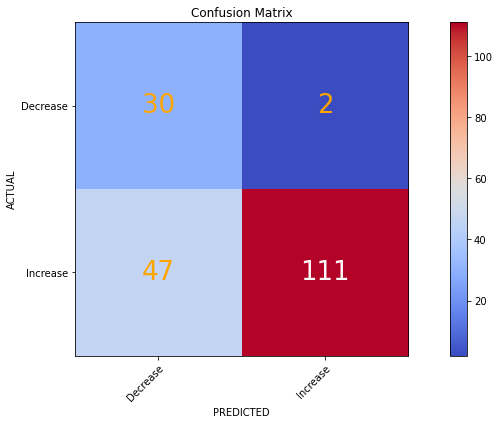

              precision    recall  f1-score   support

    Decrease       0.39      0.94      0.55        32
    Increase       0.98      0.70      0.82       158

    accuracy                           0.74       190
   macro avg       0.69      0.82      0.68       190
weighted avg       0.88      0.74      0.77       190


-------------- SVM Classification ---------------



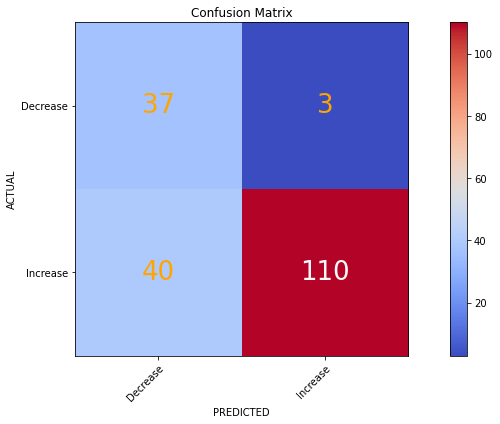

              precision    recall  f1-score   support

    Decrease       0.48      0.93      0.63        40
    Increase       0.97      0.73      0.84       150

    accuracy                           0.77       190
   macro avg       0.73      0.83      0.73       190
weighted avg       0.87      0.77      0.79       190


-------------- SGDClassifier ---------------



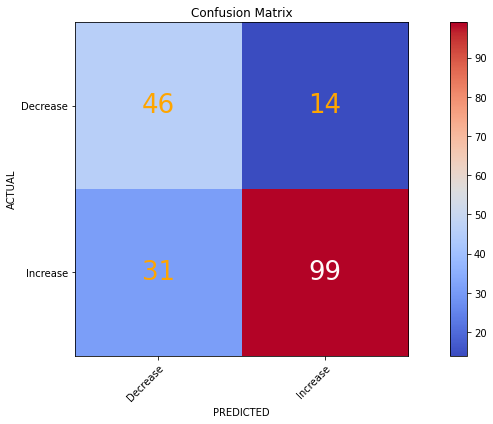

              precision    recall  f1-score   support

    Decrease       0.60      0.77      0.67        60
    Increase       0.88      0.76      0.81       130

    accuracy                           0.76       190
   macro avg       0.74      0.76      0.74       190
weighted avg       0.79      0.76      0.77       190


-------------- KNeighborsClassifier ---------------



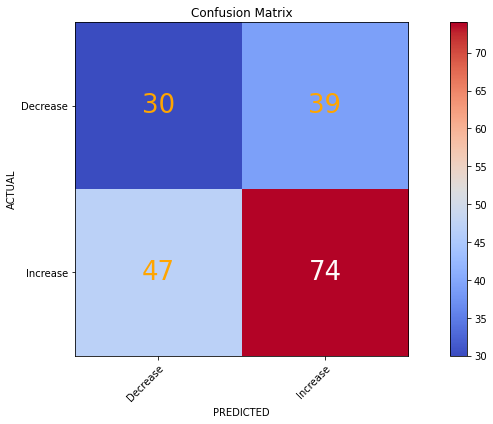

              precision    recall  f1-score   support

    Decrease       0.39      0.43      0.41        69
    Increase       0.65      0.61      0.63       121

    accuracy                           0.55       190
   macro avg       0.52      0.52      0.52       190
weighted avg       0.56      0.55      0.55       190


-------------- RandomForestClassifier ---------------



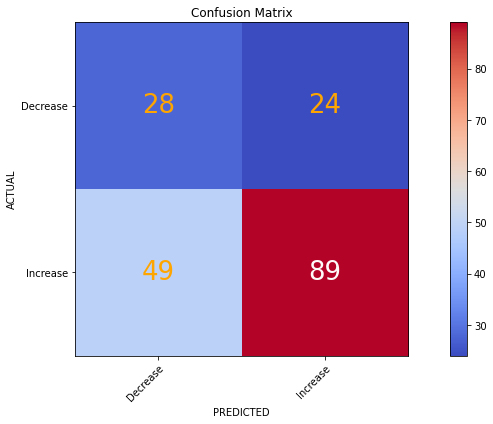

              precision    recall  f1-score   support

    Decrease       0.36      0.54      0.43        52
    Increase       0.79      0.64      0.71       138

    accuracy                           0.62       190
   macro avg       0.58      0.59      0.57       190
weighted avg       0.67      0.62      0.63       190


-------------- Gaussian Naive Bayes ---------------



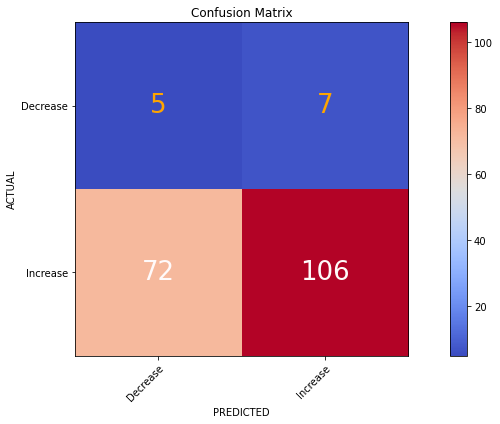

              precision    recall  f1-score   support

    Decrease       0.06      0.42      0.11        12
    Increase       0.94      0.60      0.73       178

    accuracy                           0.58       190
   macro avg       0.50      0.51      0.42       190
weighted avg       0.88      0.58      0.69       190



In [116]:
# test models
models = {  'LinearDiscriminantAnalysis':LinearDiscriminantAnalysis(solver='svd', n_components= 1),
            'SVM Classification': SVC(kernel='linear', gamma= 0.01, C= 10),
            'SGDClassifier': SGDClassifier(validation_fraction= 0.8, penalty= 'l1',n_jobs= -1,max_iter= 50, loss= 'hinge'),
            'KNeighborsClassifier':KNeighborsClassifier(p= 2, n_neighbors= 7, leaf_size= 42),
            # 'GaussianProcessClassifier': GaussianProcessClassifier(),
            'RandomForestClassifier': RandomForestClassifier(random_state= 30, n_estimators= 50, min_samples_split= 2, 
                                                             min_samples_leaf= 3, max_depth= 98, bootstrap= False),
            'Gaussian Naive Bayes':GaussianNB(var_smoothing= 0.3511191734215131)
            }

for model_name in models.keys():

    model = models[model_name]
    print('\n'+'--------------',model_name,'---------------'+'\n')
    model.fit(X_train,y_train)
    # Plot confusion matrix
    plot_confusion_matrix(model.predict(X_test),y_test, title="Confusion Matrix")
    np.set_printoptions(precision=1)
    plt.show()
    # Final Classification Report
    print(classification_report(model.predict(X_test),y_test, target_names=['Decrease', 'Increase']))